In [1]:
import random
import timeit

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

The ergodicity problem in economics: https://www.nature.com/articles/s41567-019-0732-0

# Additive Model

fixed amount is added or subtracted to initial investment.

In [4]:
def additive_model(n, h=.5, l=-.4):
    """
        returns a list of values with initial investment of 100 and rate of return is either h or l which is additive
        n = number of sequential repetitions of high or low returns in model
        h = high return
        l = low return
        if n = 10, h = .5, l = -.4 then
        for i in range(10):
            100 += random.choice([h, l])
    """
    a = []
    m = 100
    for i in range(n):
        m += random.choice([h, l])
        a.append(m)
    return a

In [5]:
additive_model(10, .5, -.4)

[100.5,
 100.1,
 99.69999999999999,
 99.29999999999998,
 99.79999999999998,
 99.39999999999998,
 99.89999999999998,
 99.49999999999997,
 99.09999999999997,
 99.59999999999997]

Multiple samples of additive model:
Array returns the 'nn' values, each value is final value after 'n' repetitions in additive model.

In [6]:
def additive_array(nn, n, h=.5, l=-.4):
    """
        returns an array of final values of size nn by calling additive_model(n, h=.5, l=-.4)
        n = number of sequential repetitions of high or low returns in model
        h = high return
        l = low return
        if nn = 100, n = 10, h = .5, l = -.4 then
        for i in range(100):
            a.append(additive_model(10)[-1])
    """
    a = []
    for i in range(nn):
        a.append(additive_model(n, h, l)[-1])
    return np.array(a)

In [7]:
a = additive_array(100, 100, .5, -.4)
a

array([103.2, 103.2, 105.9, 105. , 109.5, 107.7, 103.2, 105.9, 108.6,
       107.7, 105.9, 105. , 105.9, 100.5, 107.7, 104.1,  98.7, 108.6,
       104.1, 105.9, 104.1, 103.2, 102.3, 110.4, 106.8, 113.1, 108.6,
       108.6, 104.1, 106.8, 105. , 104.1, 105.9,  98.7, 102.3, 110.4,
       107.7, 108.6, 105.9, 104.1, 106.8, 105.9, 100.5, 106.8, 108.6,
        98.7, 105.9, 105. , 102.3, 100.5, 106.8, 104.1,  99.6,  98.7,
       105. , 105.9, 101.4, 110.4,  98.7, 113.1, 102.3, 107.7, 105. ,
       109.5, 105. , 105.9, 108.6, 108.6, 103.2, 105.9, 104.1, 111.3,
       100.5,  99.6, 104.1,  99.6,  99.6, 101.4, 106.8, 112.2, 106.8,
        96.9, 103.2, 103.2, 101.4, 103.2, 110.4,  95.1, 102.3, 105.9,
       106.8,  98.7, 103.2, 112.2,  99.6,  96.9, 109.5, 112.2, 102.3,
       105. ])

In [8]:
(a>100).sum(), a.mean(), a.std()

(86, 104.87399999999971, 3.86270941179895)

when high is 0.5 and low is -0.4, after 100 repetions, average of additive array is approximately equal to 105 which is 100*(0.5-0.4)/2

In [9]:
a = additive_array(100, 1000, .5, -.5)
(a>100).sum(), a.mean(), a.std()

(43, 99.0, 16.325440269714015)

In [15]:
a = additive_array(100, 1000, .3, -.3)
(a>100).sum(), a.mean(), a.std()

(46, 100.426, 8.170711352140568)

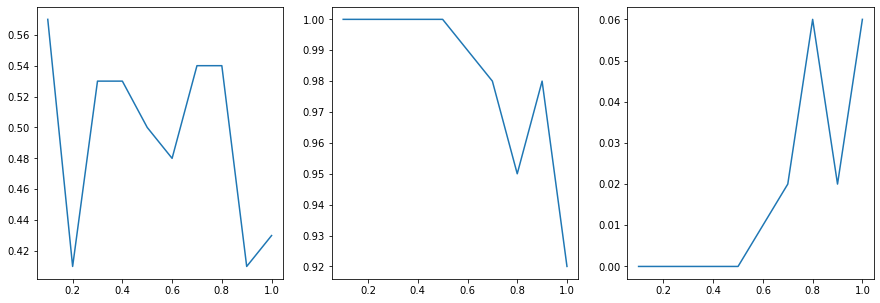

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
x = np.linspace(.1,1,10)
for i in range(1):
    axes[0].plot(x, [(additive_array(100, 1000, j, -j)>100).sum()/100 for j in x])
for i in range(1):
    axes[1].plot(x, [(additive_array(100, 1000, j+.1, -j)>100).sum()/100 for j in x])
for i in range(1):
    axes[2].plot(x, [(additive_array(100, 1000, j, -j-.1)>100).sum()/100 for j in x])

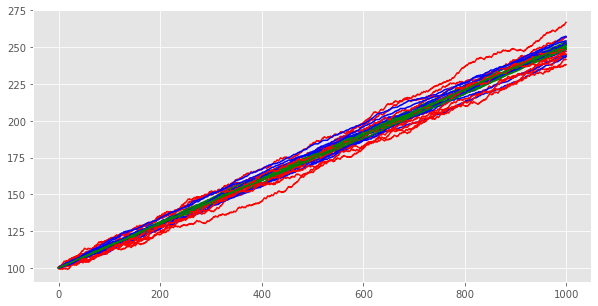

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
for i in range(10):
    plt.plot(additive_model(1000, .5, -.2), 'r')
    plt.plot(additive_model(1000, .3, .0), 'b')
    plt.plot(additive_model(1000, .2, .1), 'g')

# Multiplicative Model

certain percentage of amount is added or substracted to initial investment.

In [12]:
def multiplicative_model(n, h=.5, l=-.4):
    """
        returns a list of values with initial investment of 100 and rate of return is either h or l which is multiplicative
        n = number of sequential repetitions of high or low returns in model
        h = high return
        l = low return
        if n = 10, h = .5, l = -.4 then
        for i in range(10):
            100 *= (1+random.choice([h, l]))
    """
    a = []
    m = 100
    for i in range(n):
        m *= (1+random.choice([h, l]))
        a.append(m)
    return a

In [13]:
multiplicative_model(10)

[60.0,
 90.0,
 54.0,
 81.0,
 48.6,
 29.16,
 17.496,
 10.497599999999998,
 6.298559999999999,
 3.7791359999999994]

function for constant growth rate

In [14]:
def average(n, m):
    lst = []
    x = 100
    for i in range(n):
        x = x*m
        lst.append(x)
    return lst

comparison between multiplicative model and constant growth rate which is average of high and low rates. 

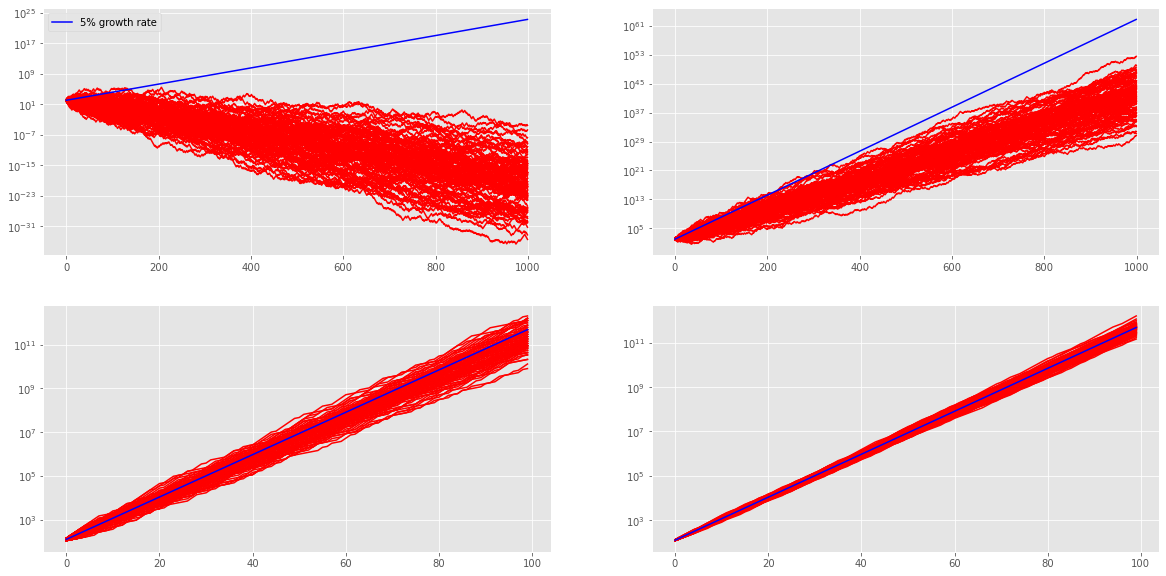

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))
for i in range(100):
    axes[0,0].plot(multiplicative_model(1000, .5, -.4), 'r')
    axes[0,0].set_yscale('log')
axes[0,0].plot(average(1000, 1.05), 'b', label='5% growth rate')
axes[0,0].legend()
for i in range(100):
    axes[0,1].plot(multiplicative_model(1000, .5, -.2), 'r')
    axes[0,1].set_yscale('log')
axes[0,1].plot(average(1000, 1.15), 'b', label='15% growth rate')
for i in range(100):
    axes[1,0].plot(multiplicative_model(100, .4, .1), 'r')
    axes[1,0].set_yscale('log')
axes[1,0].plot(average(100, 1.25), 'b', label='25% growth rate')
for i in range(100):
    axes[1,1].plot(multiplicative_model(100, .3, .2), 'r')
    axes[1,1].set_yscale('log')
axes[1,1].plot(average(100, 1.25), 'b', label='25% growth rate')

In [17]:
def multiplicative_array(nn, n, h=.5, l=-.4):
    """
        returns an array of final values of size nn by calling additive_model(n, h=.5, l=-.4)
        n = number of sequential repetitions of high or low returns in model
        h = high return
        l = low return
        if nn = 100, n = 10, h = .5, l = -.4 then
        for i in range(100):
            a.append(additive_model(10)[-1])
    """
    a = []
    for i in range(nn):
        a.append(multiplicative_model(n, h, l)[-1])
    return np.array(a)

In [18]:
multiplicative_array(10, 100, .5, -.4)

array([5.27746581e-03, 5.15377521e-01, 8.05277376e+00, 5.15377521e-01,
       3.37757812e-04, 5.40412499e-05, 3.14561475e+02, 5.27746581e-03,
       3.14561475e+02, 2.06151008e-01])

In [28]:
a = multiplicative_array(100, 100, .5, -.4)
(a>100).sum(), a.mean(), a.std()

(10, 275.34315841028786, 1412.9154789666345)

In [29]:
a = multiplicative_array(100, 100, .3, -.2)
(a>100).sum(), a.mean(), a.std()

(82, 12091.79139659433, 36109.441647349646)

In [30]:
a = multiplicative_array(100, 100, .1, -.0)
(a>100).sum(), a.mean(), a.std()

(100, 12810.783227550548, 6355.06725815783)

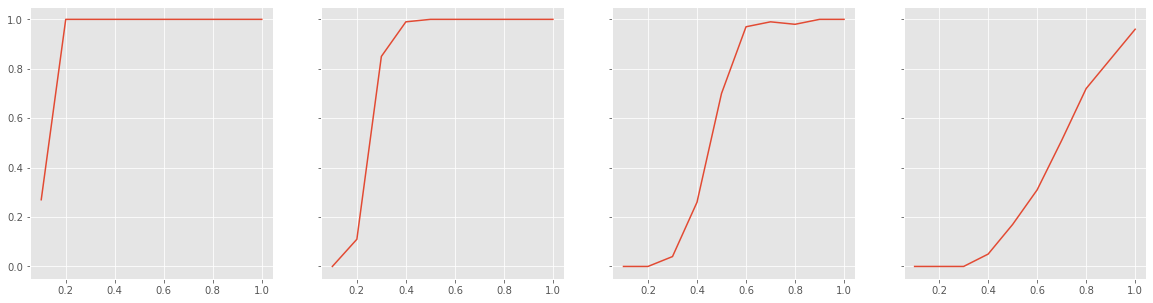

In [22]:
fig, axes = plt.subplots(1, 4, figsize=(20,5), sharey=True)
x = np.linspace(.1,1,10)
for i in range(1):
    axes[0].plot(x, [(multiplicative_array(100, 100, j, -.1)>100).sum()/100 for j in x])
for i in range(1):
    axes[1].plot(x, [(multiplicative_array(100, 100, j, -.2)>100).sum()/100 for j in x])
for i in range(1):
    axes[2].plot(x, [(multiplicative_array(100, 100, j, -.3)>100).sum()/100 for j in x])
for i in range(1):
    axes[3].plot(x, [(multiplicative_array(100, 100, j, -.4)>100).sum()/100 for j in x])

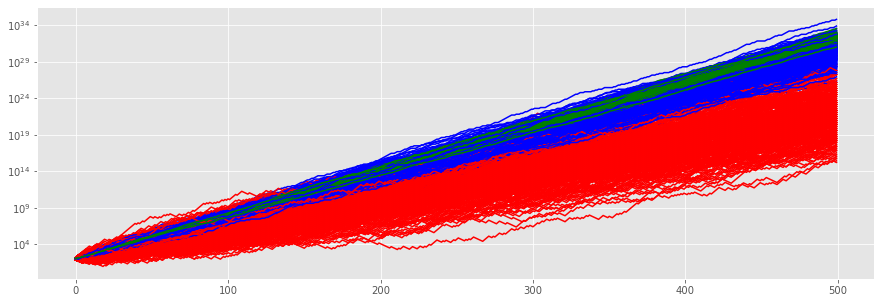

In [31]:
plt.figure(figsize=(15,5))
for i in range(300):
    plt.plot(multiplicative_model(500, .5, -.2), 'r')
    plt.plot(multiplicative_model(500, .3, .0), 'b')
    plt.plot(multiplicative_model(500, .2, .1), 'g')
    plt.yscale('log')

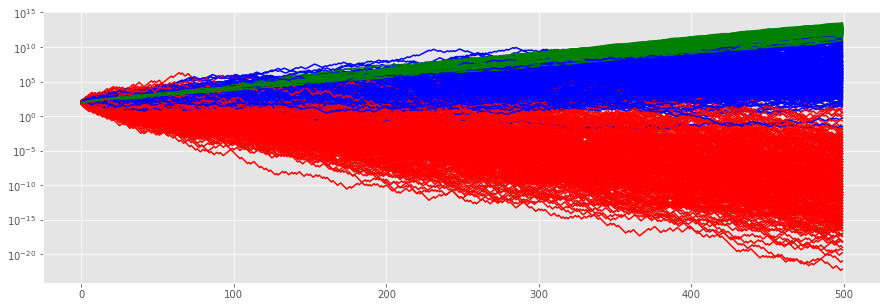

In [35]:
plt.figure(figsize=(15,5))
for i in range(300):
    plt.plot(multiplicative_model(500, .5, -.4), 'r')
    plt.plot(multiplicative_model(500, .3, -.2), 'b')
    plt.plot(multiplicative_model(500, .1, -.0), 'g')
    plt.yscale('log')

In [119]:
index=np.linspace(.1,2,20)
df = pd.DataFrame(index=index)
for l in np.linspace(.1,.5,5):
    df[-l] = [((additive_array(100, 10, i, -l)>100).sum())/100 for i in index]

In [120]:
df

,-0.1,-0.2,-0.3,-0.4,-0.5
0.1,0.36,0.16,0.03,0.00,0.01
0.2,0.85,0.35,0.42,0.17,0.03
0.3,0.93,0.61,0.30,0.40,0.15
0.4,1.00,0.78,0.60,0.38,0.40
0.5,0.99,0.94,0.89,0.65,0.42
0.6,0.99,0.95,0.87,0.63,0.65
0.7,0.99,0.92,0.94,0.85,0.56
0.8,0.98,0.88,0.93,0.80,0.86
0.9,1.00,1.00,0.91,0.89,0.88
1.0,1.00,0.98,0.91,0.95,0.83


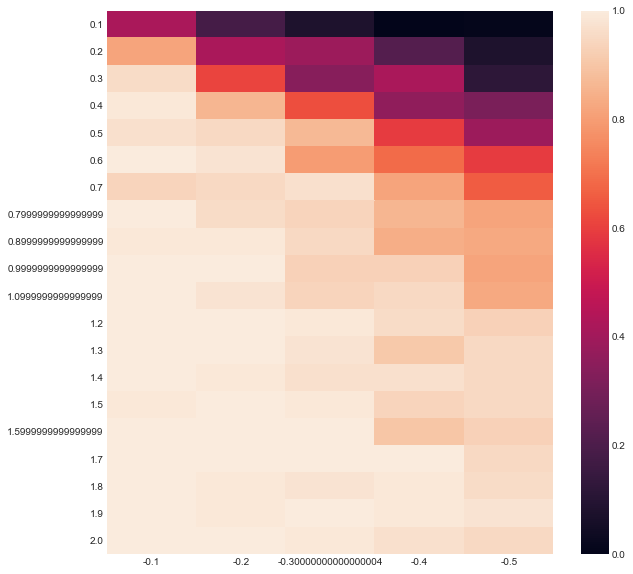

In [95]:
plt.figure(figsize=(10,10))
sns.heatmap(df)

In [101]:
index=np.linspace(.1,2,20)
df = pd.DataFrame(index=index)
for l in np.linspace(.1,.5,5):
    df[-l] = [((multiplicative_array(100, 10, i, -l)>100).sum())/100 for i in index]

In [102]:
df

,-0.1,-0.2,-0.3,-0.4,-0.5
0.1,0.33,0.07,0.06,0.01,0.02
0.2,0.79,0.38,0.14,0.06,0.02
0.3,0.96,0.58,0.49,0.20,0.12
0.4,0.98,0.80,0.35,0.12,0.08
0.5,0.93,0.84,0.67,0.46,0.17
0.6,0.99,0.83,0.63,0.37,0.41
0.7,0.99,0.96,0.65,0.72,0.38
0.8,0.99,0.95,0.82,0.59,0.40
0.9,0.99,0.97,0.82,0.60,0.33
1.0,1.00,0.97,0.83,0.63,0.40


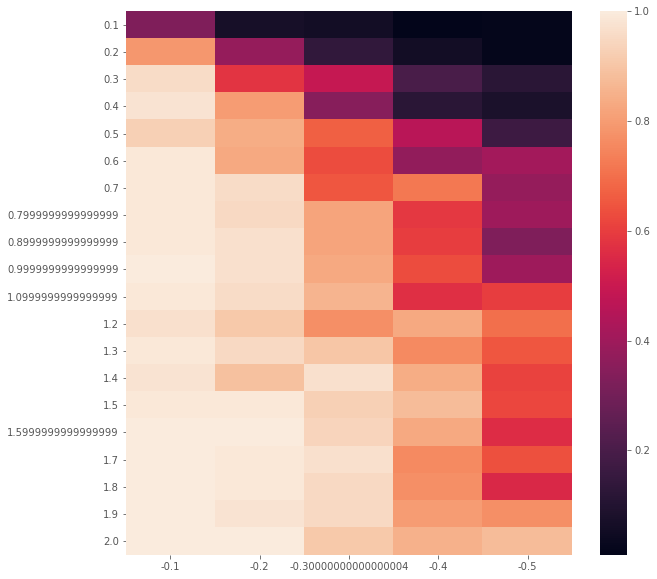

In [103]:
plt.figure(figsize=(10,10))
sns.heatmap(df)

In [60]:
[((additive_array(100, 10, i, -.4)>100).sum())/100 for i in np.linspace(.1,1,10)]

[0.02, 0.16, 0.37, 0.34, 0.69, 0.65, 0.9, 0.85, 0.85, 0.95]

In [75]:
(additive_array(100, 10, .3, -.4)>100).sum()

36

Text(0, 0.5, 'probability')

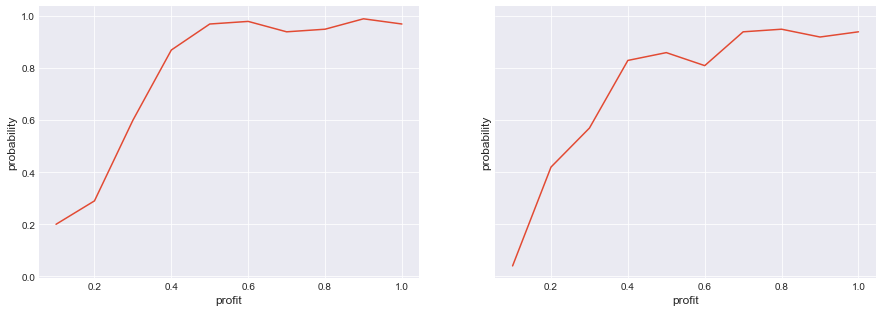

In [36]:
plt.style.use('seaborn-darkgrid')
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True, figsize=(15,5))
x=np.linspace(.1,1,10)
ax1.plot( x, [((additive_array(100, 10, i, -.2)>100).sum())/100 for i in x])
ax1.set_xlabel('profit')
ax1.set_ylabel('probability')
ax2.plot( x, [((multiplicative_array(100, 10, i, -.2)>100).sum())/100 for i in x])
ax2.set_xlabel('profit')
ax2.set_ylabel('probability')